--- Частина 1: Штучні дані (sklearn) ---

==================== Аналіз: Sklearn Generated ====================
Accuracy:  0.8700
Precision: 0.8730
Recall:    0.8700
F1 Score:  0.8701


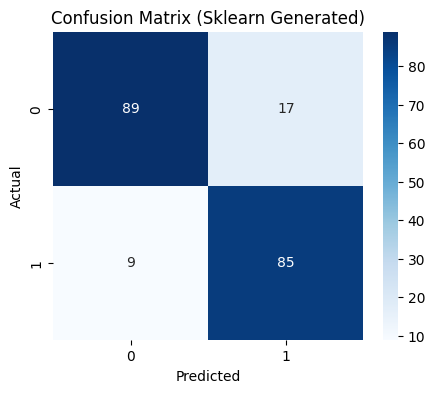


--- Частина 2: Реальні дані (Kaggle) ---
Завантажено файл: bats_information.csv
Знайдено класів кажанів: 18

==================== Аналіз: Kaggle Dataset (Bats) ====================
Accuracy:  0.0608
Precision: 0.0608
Recall:    0.0608
F1 Score:  0.0606


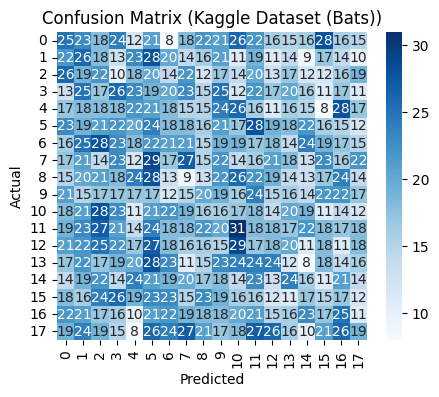


--- Частина 3: Генерація через NumPy (Bonus) ---


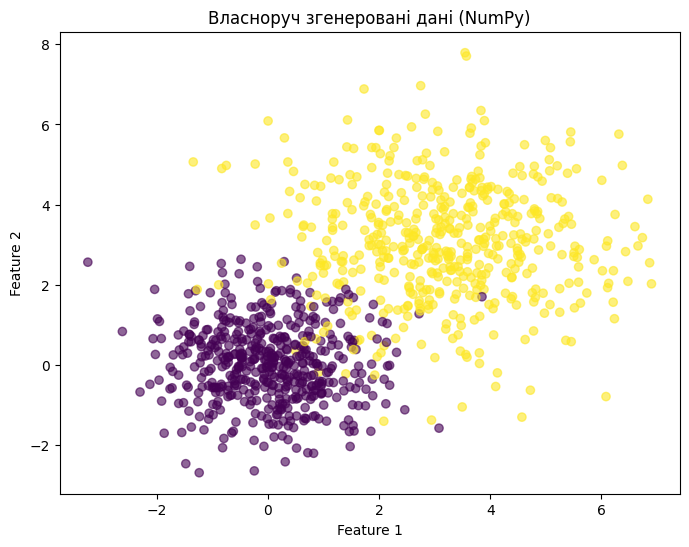


==================== Аналіз: NumPy Custom Generation ====================
Accuracy:  0.9550
Precision: 0.9555
Recall:    0.9550
F1 Score:  0.9550


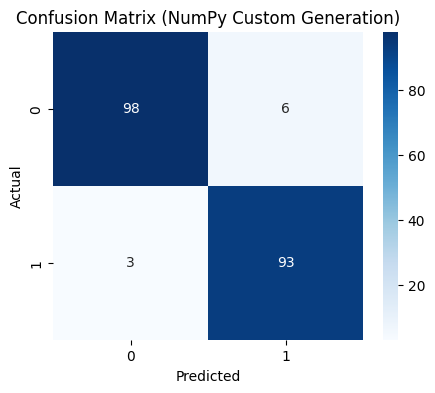

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler

# ==========================================
# Універсальна функція для оцінки моделей
# ==========================================
def evaluate_dataset(X, y, dataset_name="Dataset"):
    print(f"\n{'='*20} Аналіз: {dataset_name} {'='*20}")
    
   
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    
    
    model = RandomForestClassifier(random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
   
    print(f"Accuracy:  {accuracy_score(y_test, y_pred):.4f}")
    print(f"Precision: {precision_score(y_test, y_pred, average='weighted'):.4f}")
    print(f"Recall:    {recall_score(y_test, y_pred, average='weighted'):.4f}")
    print(f"F1 Score:  {f1_score(y_test, y_pred, average='weighted'):.4f}")
    
   
    plt.figure(figsize=(5, 4))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix ({dataset_name})')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# ==========================================
# ЗАВДАННЯ 1: DatasetGenerator (sklearn) [cite: 54]
# ==========================================
print("--- Частина 1: Штучні дані (sklearn) ---")


X_gen, y_gen = make_classification(
    n_samples=1000, 
    n_features=10, 
    n_informative=8, 
    n_redundant=2, 
    n_classes=2, 
    random_state=42
)


df_gen = pd.DataFrame(X_gen, columns=[f'Feature_{i}' for i in range(10)])
df_gen['Target'] = y_gen

evaluate_dataset(df_gen.drop('Target', axis=1), df_gen['Target'], "Sklearn Generated")


# ==========================================
# ЗАВДАННЯ 2: Реальні дані з Kaggle (ВИПРАВЛЕНО)
# ==========================================
print("\n--- Частина 2: Реальні дані (Kaggle) ---")

try:
    kaggle_file_name = 'bats_information.csv' 
    
   
    df_kaggle = pd.read_csv(kaggle_file_name)
    print(f"Завантажено файл: {kaggle_file_name}")
    
   
    df_kaggle = df_kaggle.dropna()
    
    
    target_column = 'Species'
    
    if target_column in df_kaggle.columns:
       
        y_temp = df_kaggle[target_column]
        
       
        X_temp = df_kaggle.drop(target_column, axis=1)
        
        
        X_kaggle = pd.get_dummies(X_temp, drop_first=True)
        
       
        y_kaggle, class_names = pd.factorize(y_temp)
        
        print(f"Знайдено класів кажанів: {len(class_names)}")
        
       
        evaluate_dataset(X_kaggle, y_kaggle, "Kaggle Dataset (Bats)")
        
    else:
        print(f"Помилка: Колонка '{target_column}' не знайдена. Перевірте написання.")

except FileNotFoundError:
    print(f"⚠️ Файл '{kaggle_file_name}' не знайдено. Перевірте, чи він лежить поруч з кодом.")


# ==========================================
# ЗАВДАННЯ 3 (Опціональне): NumPy генерація 
# ==========================================
print("\n--- Частина 3: Генерація через NumPy (Bonus) ---")

np.random.seed(42)
n_samples = 500


class_0_x1 = np.random.normal(0, 1, n_samples)
class_0_x2 = np.random.normal(0, 1, n_samples)
labels_0 = np.zeros(n_samples) 


class_1_x1 = np.random.normal(3, 1.5, n_samples)
class_1_x2 = np.random.normal(3, 1.5, n_samples)
labels_1 = np.ones(n_samples)  


X_numpy = pd.DataFrame({
    'Feature_1': np.concatenate([class_0_x1, class_1_x1]),
    'Feature_2': np.concatenate([class_0_x2, class_1_x2])
})
y_numpy = np.concatenate([labels_0, labels_1])


idx = np.random.permutation(len(y_numpy))
X_numpy = X_numpy.iloc[idx]
y_numpy = y_numpy[idx]


plt.figure(figsize=(8, 6))
plt.scatter(X_numpy['Feature_1'], X_numpy['Feature_2'], c=y_numpy, cmap='viridis', alpha=0.6)
plt.title("Власноруч згенеровані дані (NumPy)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

evaluate_dataset(X_numpy, y_numpy, "NumPy Custom Generation")